In [1]:
import torch
import cv2 
from matplotlib import pyplot as plt
import os
import numpy as np
import PIL
from PIL import Image

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "0"  # Set the GPU 0 to use

In [3]:
!ls data/Samsung_SNU/'[SET 1]'/F8

10_F8.png  13_F8.png  16_F8.png  3_F8.png  6_F8.png  9_F8.png
11_F8.png  14_F8.png  1_F8.png	 4_F8.png  7_F8.png
12_F8.png  15_F8.png  2_F8.png	 5_F8.png  8_F8.png


In [6]:
data_path = 'data/Samsung_SNU/[SET 1]/F8'
postfix = "_F8.png"

In [1]:
from data.core.data_loader import load_whole_image 

In [2]:
data_path = "data/Samsung_SNU"
num_per_Ffolder = 16
whole_images = load_whole_image(data_path,num_per_Ffolder)

=== extracting [SET 1] ===
data/Samsung_SNU/[SET 1]/F32
data/Samsung_SNU/[SET 1]/F8
data/Samsung_SNU/[SET 1]/F64
data/Samsung_SNU/[SET 1]/F16
=== extracting [SET 2] ===
data/Samsung_SNU/[SET 2]/F32
data/Samsung_SNU/[SET 2]/F8
data/Samsung_SNU/[SET 2]/F64
data/Samsung_SNU/[SET 2]/F16
=== extracting [SET 3] ===
data/Samsung_SNU/[SET 3]/F32
data/Samsung_SNU/[SET 3]/F8
data/Samsung_SNU/[SET 3]/F64
data/Samsung_SNU/[SET 3]/F16
=== extracting [SET 4] ===
data/Samsung_SNU/[SET 4]/F32
data/Samsung_SNU/[SET 4]/F8
data/Samsung_SNU/[SET 4]/F64
data/Samsung_SNU/[SET 4]/F16


In [8]:
print("=== dict structure ===")
sub_dict = whole_images
while(True):
    try :
        for keys in sub_dict.keys():
            print(keys, end=", ")
        sub_dict = sub_dict[keys]
        print("")
    except : 
        break

=== dict structure ===
[SET 1], [SET 2], [SET 3], [SET 4], 
F32, F8, F64, F16, 
1_F16.png, 2_F16.png, 3_F16.png, 4_F16.png, 5_F16.png, 6_F16.png, 7_F16.png, 8_F16.png, 9_F16.png, 10_F16.png, 11_F16.png, 12_F16.png, 13_F16.png, 14_F16.png, 15_F16.png, 16_F16.png, 


In [9]:
def load_single_image(set_num : int, f_num : int, num : int):
    flag1 = set_num <0 or set_num >4
    flag2 = f_num not in [8,16,32,64]
    flag3 = num not in range(1,num_per_Ffolder+1)
    if flag1 or flag2 or flag3:
        print(f"True means Undesirable arugment\n1st : {flag1}, 2nd : {flag2}, 3rd : {flag3}")
        raise                                                                   
    return whole_images[f"[SET {set_num}]"][f'F{f_num}'][f"{num}_F{f_num}.png"]

In [10]:
imageF8 = whole_images['[SET 1]']['F8']['1_F8.png']
imageF64 = whole_images['[SET 1]']['F64']['1_F64.png']

In [11]:
imageF8.shape

(2048, 3072)

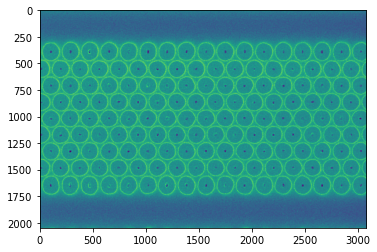

In [90]:
plt.imshow(imageF8)

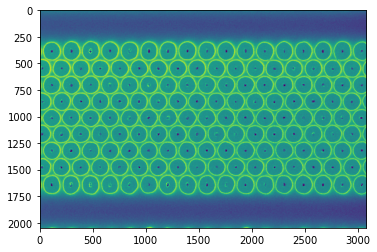

In [177]:
plt.imshow(imageF64)

In [186]:
print("=== mean F8 vs F64 === ")
print(imageF8.mean(), imageF64.mean())
print("=== variance F8 vs F64 === ")
print(imageF8.var(),imageF64.var())
print("=== std F8 vs F64 === ")
print(imageF8.std(),imageF64.std())

=== mean F8 vs F64 === 
126.92456436157227 129.51787360509238
=== variance F8 vs F64 === 
2076.3139842742153 2384.2307167204513
=== std F8 vs F64 === 
45.56658846429273 48.82858503705029


In [223]:
len(value_cnt)

256

(array([ 6998.,   714.,   805.,   892.,   939.,  1071.,  1172.,  1286.,
         1275.,  1543.,  1561.,  1694.,  1821.,  2039.,  2226.,  2391.,
         2570.,  2691.,  2843.,  3120.,  3396.,  3632.,  3714.,  3972.,
         4204.,  4514.,  4879.,  5008.,  5485.,  5793.,  6082.,  6311.,
         6765.,  7144.,  7426.,  7751.,  8163.,  8602.,  9166.,  9268.,
         9897., 10262., 10813., 11246., 11936., 12197., 12841., 13218.,
        13582., 14219., 14679., 15194., 15920., 16620., 16934., 17719.,
        18307., 18900., 19347., 20061., 20672., 21352., 21952., 22574.,
        23161., 23714., 24437., 25198., 25374., 26385., 27131., 27466.,
        28110., 28905., 29675., 29714., 30968., 31795., 32014., 32752.,
        33370., 34006., 34384., 35059., 36027., 36317., 37675., 37720.,
        38329., 39033., 39753., 40169., 40731., 41667., 41929., 42819.,
        43040., 43654., 44167., 44879., 45342., 45663., 46127., 46435.,
        47219., 47564., 47725., 48799., 48876., 49500., 49458., 

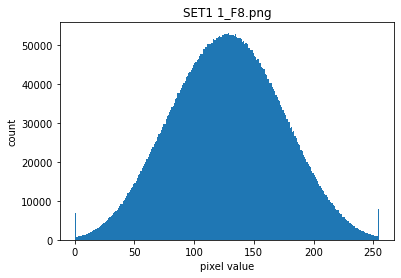

In [19]:
bins = [i for i in range(0,256)]
plt.title('SET1 1_F8.png') 
plt.xlabel('pixel value')
plt.ylabel('count')
#value_cnt = np.bincount(imageF8.flatten(),bins)
plt.hist(imageF8.flatten(),bins,log=False)

(array([ 6868.,   610.,   727.,   816.,   892.,   999.,  1097.,  1142.,
         1206.,  1425.,  1582.,  1653.,  1746.,  1926.,  2127.,  2223.,
         2420.,  2557.,  2861.,  3109.,  3187.,  3633.,  3732.,  4084.,
         4310.,  4573.,  4951.,  5384.,  5665.,  5936.,  6281.,  6709.,
         6969.,  7503.,  7831.,  8209.,  8853.,  9151.,  9484., 10445.,
        10713., 11015., 11713., 12072., 12668., 13286., 13633., 14225.,
        15065., 15340., 15887., 16446., 17140., 17717., 18221., 18903.,
        19493., 19888., 20836., 21185., 22025., 22559., 23106., 23322.,
        24191., 24619., 25368., 25920., 26716., 26875., 27369., 27742.,
        28918., 29404., 29793., 29950., 31080., 31238., 31754., 32706.,
        33033., 33533., 34301., 34610., 35528., 35758., 36474., 36603.,
        37018., 37434., 38240., 38775., 39450., 39598., 40024., 40913.,
        41546., 41891., 42264., 42797., 43413., 44149., 44740., 44919.,
        45086., 46088., 46220., 46988., 47030., 47803., 48243., 

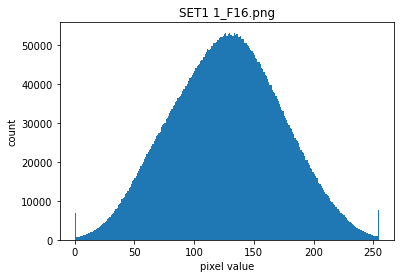

In [20]:
plt.title('SET1 1_F16.png') 
plt.xlabel('pixel value')
plt.ylabel('count')
plt.hist(load_single_image(1,16,1).flatten(), bins)

(array([ 6729.,   531.,   535.,   565.,   660.,   759.,   812.,   896.,
          953.,  1095.,  1194.,  1356.,  1409.,  1658.,  1798.,  1914.,
         2104.,  2219.,  2485.,  2777.,  2986.,  3315.,  3553.,  3964.,
         4284.,  4416.,  5033.,  5193.,  5875.,  6264.,  6452.,  7173.,
         7537.,  8016.,  8703.,  9147.,  9740., 10246., 11017., 11596.,
        12214., 12830., 13299., 14021., 14671., 15496., 16206., 16925.,
        17451., 17916., 18906., 19428., 20076., 20783., 21184., 21979.,
        22621., 23286., 23694., 24323., 24323., 25363., 25909., 26344.,
        26762., 27133., 27444., 27954., 28109., 28234., 28913., 29123.,
        29580., 29542., 29815., 30080., 30372., 30284., 30696., 31185.,
        31100., 31525., 31310., 31893., 31966., 32082., 32424., 32743.,
        32909., 33523., 33647., 33657., 34131., 34730., 35107., 35410.,
        36107., 36347., 36873., 37485., 37992., 38799., 39351., 39757.,
        40805., 40788., 41600., 42478., 42906., 43569., 44907., 

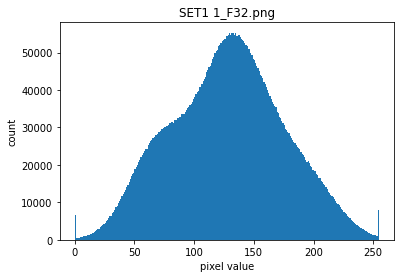

In [21]:
plt.title('SET1 1_F32.png') 
plt.xlabel('pixel value')
plt.ylabel('count')
plt.hist(load_single_image(1,32,1).flatten(), bins)

(array([ 6579.,   316.,   342.,   352.,   401.,   433.,   478.,   562.,
          602.,   614.,   674.,   758.,   884.,  1001.,  1133.,  1270.,
         1371.,  1511.,  1672.,  1934.,  2194.,  2487.,  2576.,  3057.,
         3320.,  3664.,  4065.,  4554.,  5047.,  5498.,  6013.,  6511.,
         7101.,  7891.,  8447.,  9171.,  9962., 10828., 11511., 12567.,
        13069., 14213., 14972., 16093., 16535., 17753., 18657., 19466.,
        20438., 21528., 22310., 23220., 23909., 24810., 25720., 26155.,
        27239., 27339., 28174., 28548., 29290., 29514., 30296., 30386.,
        30941., 30542., 31379., 30875., 31043., 30721., 30999., 31141.,
        30846., 30879., 29990., 30056., 29412., 29515., 28714., 28626.,
        28461., 28034., 27074., 27414., 26807., 26714., 26040., 26189.,
        25685., 25794., 25609., 25682., 25482., 25920., 25453., 25877.,
        26220., 26643., 26784., 27745., 27810., 28284., 29573., 29835.,
        30785., 31803., 33250., 33972., 35024., 36300., 37698., 

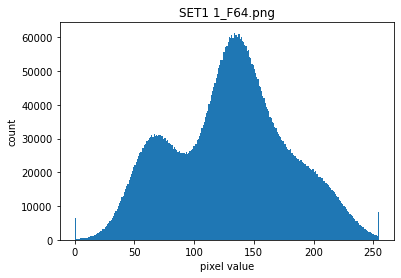

In [22]:
plt.title('SET1 1_F64.png') 
plt.xlabel('pixel value')
plt.ylabel('count')
plt.hist(imageF64.flatten(),bins)

In [55]:
from PIL import Image
im = Image.open(data_path+"/"+str(1) + postfix)

In [57]:
# extract other basic metadata
info_dict = {
    "Filename": im.filename,
    "Image Size": im.size,
    "Image Height": im.height,
    "Image Width": im.width,
    "Image Format": im.format,
    "Image Mode": im.mode,
    "Image is Animated": getattr(im, "is_animated", False),
    "Frames in Image": getattr(im, "n_frames", 1)
}

for label,value in info_dict.items():
    print(f"{label:25}: {value}")

Filename                 : data/Samsung_SNU/[SET 1]/F8/1_F8.png
Image Size               : (3072, 2048)
Image Height             : 2048
Image Width              : 3072
Image Format             : PNG
Image Mode               : L
Image is Animated        : False
Frames in Image          : 1


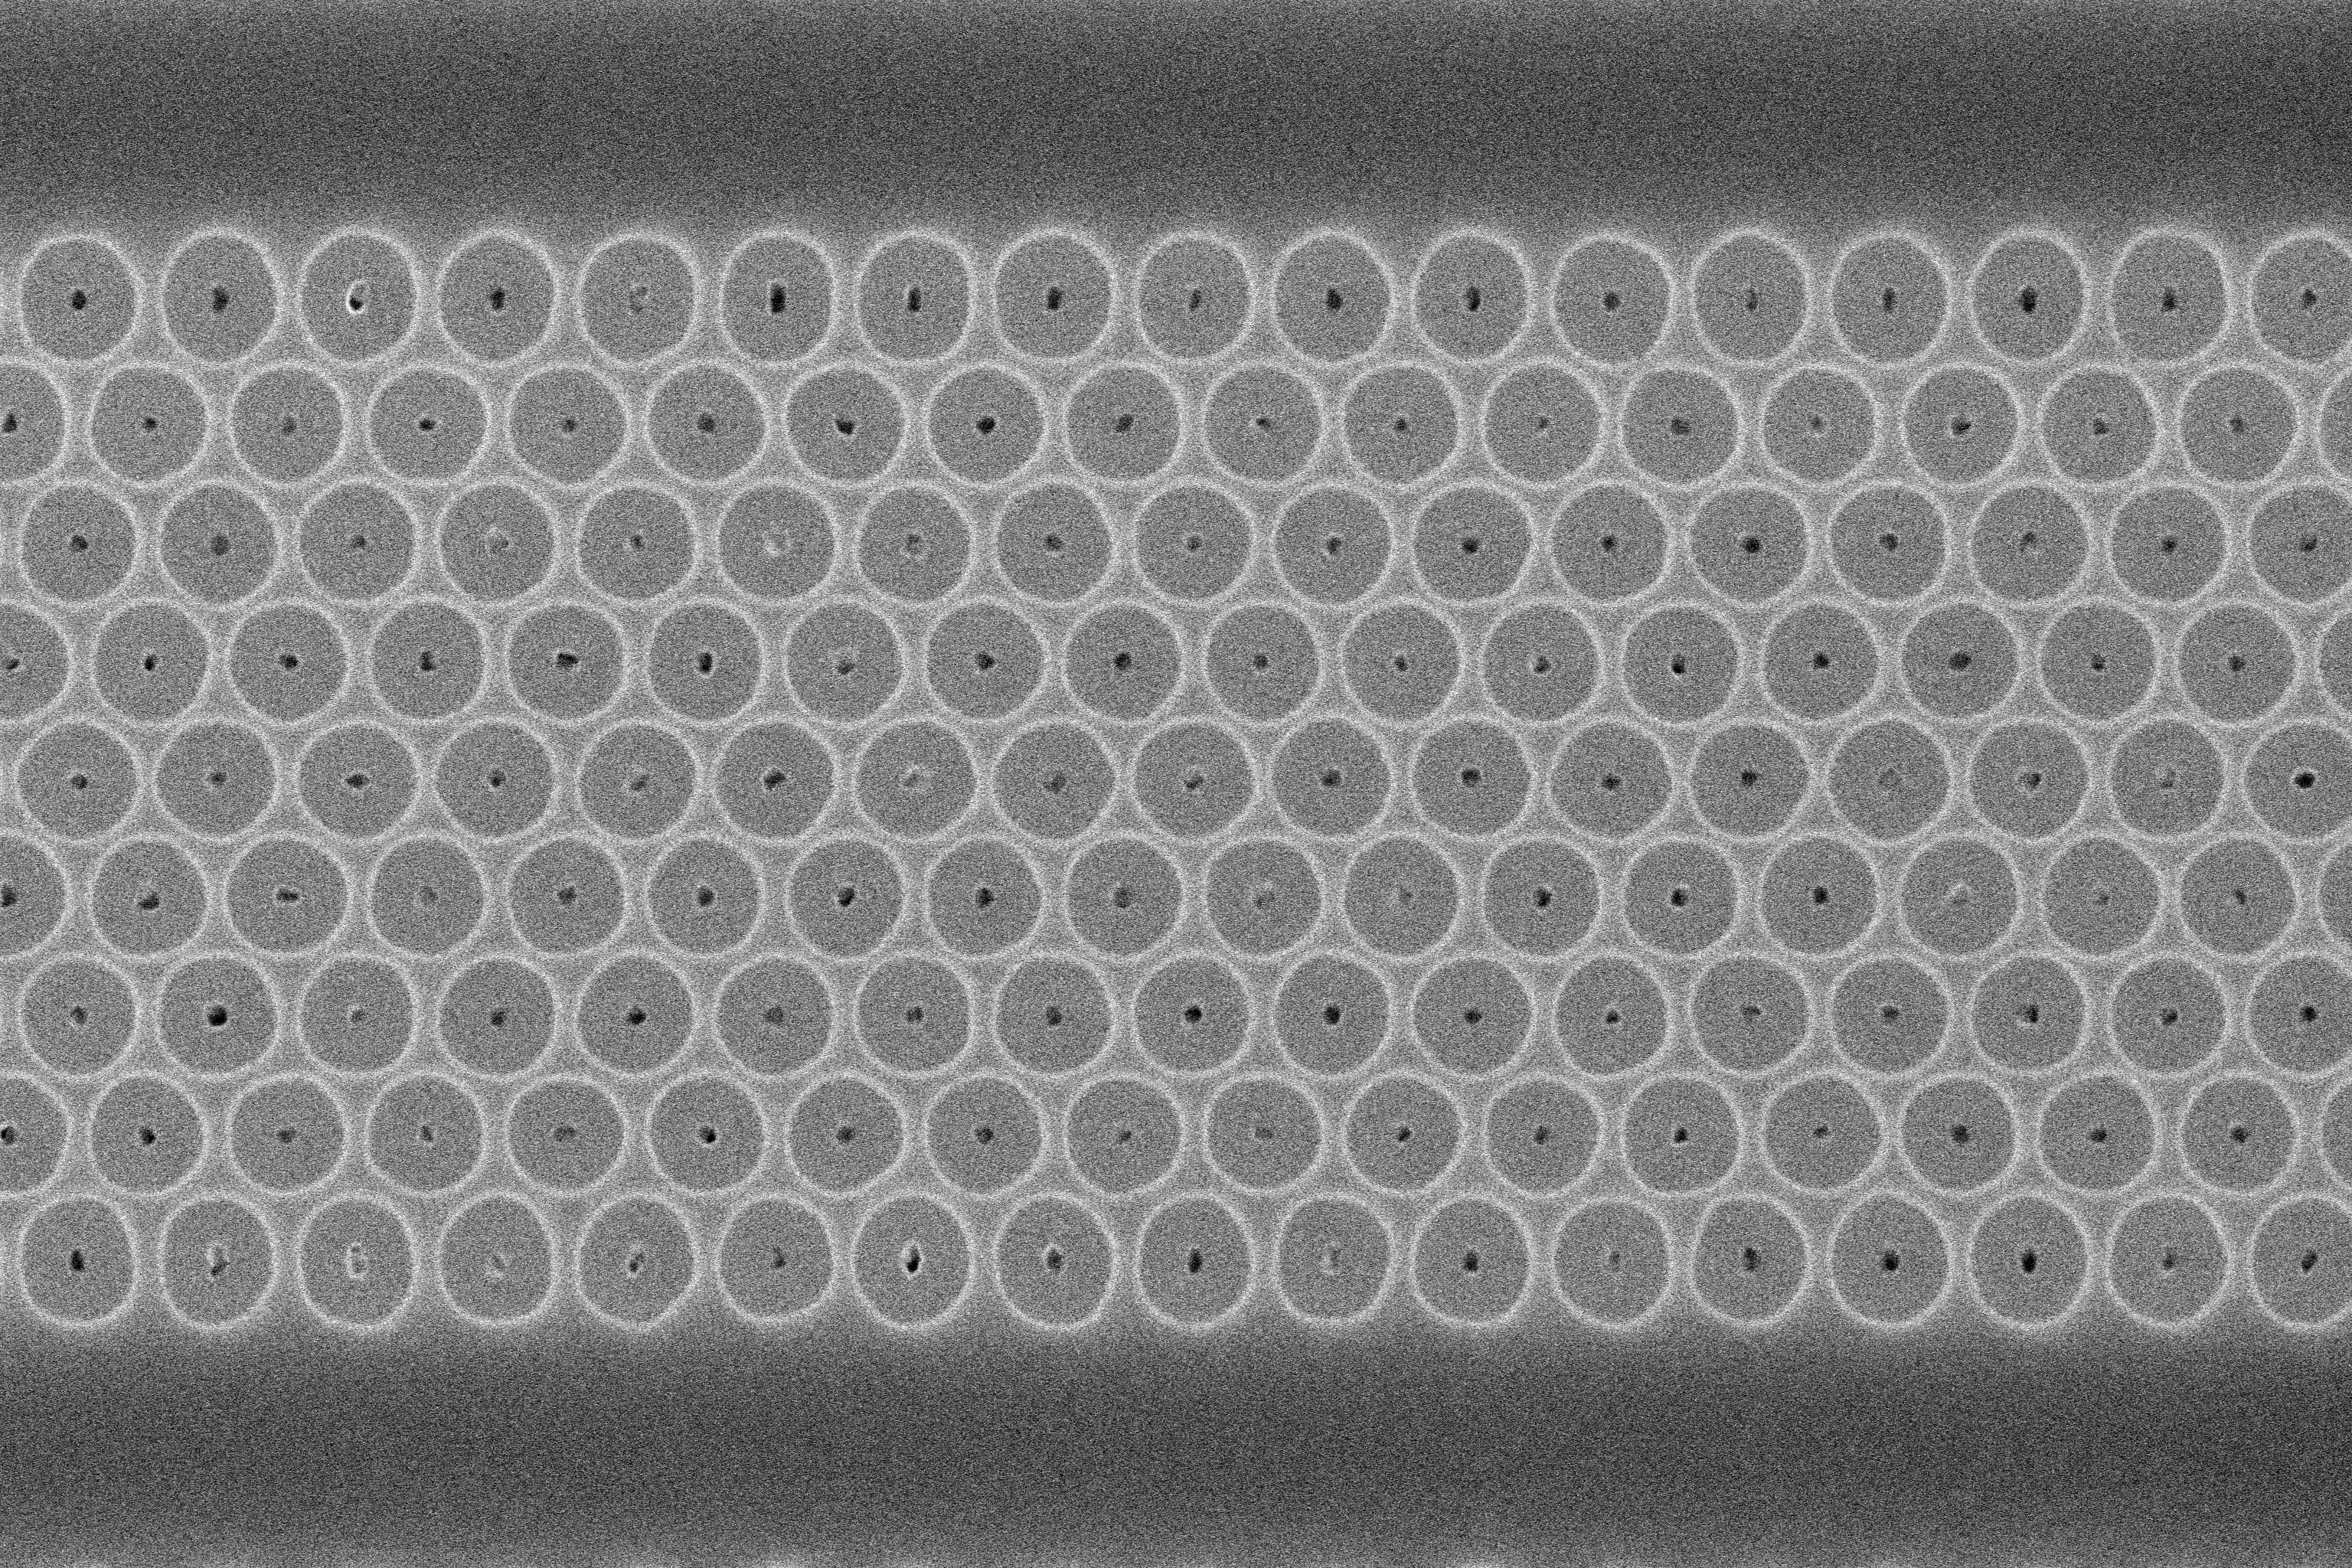

In [58]:
im

In [94]:
cleandata_path = 'data/Samsung_SNU/[SET 1]/F64'
!ls 'data/Samsung_SNU/[SET 1]/F64'

10_F64.png  13_F64.png	16_F64.png  3_F64.png  6_F64.png  9_F64.png
11_F64.png  14_F64.png	1_F64.png   4_F64.png  7_F64.png
12_F64.png  15_F64.png	2_F64.png   5_F64.png  8_F64.png


In [260]:
imageF8 = load_single_image(1,8,1)

(array([24841.,  1924.,  1982.,  2181.,  2326.,  2374.,  2640.,  2774.,
         2856.,  2990.,  3138.,  3376.,  3503.,  3710.,  3963.,  4047.,
         4358.,  4613.,  4789.,  4952.,  5315.,  5555.,  5826.,  6200.,
         6312.,  6667.,  7085.,  7171.,  7691.,  7876.,  8174.,  8582.,
         8783.,  9324.,  9705., 10319., 10404., 10674., 11244., 11528.,
        11987., 12357., 12846., 13450., 13859., 14288., 14777., 14978.,
        15590., 16140., 16591., 17375., 17327., 18395., 18481., 19041.,
        19892., 20077., 21050., 21317., 21937., 22366., 22906., 23439.,
        24005., 24662., 25249., 25652., 26284., 26887., 27296., 28135.,
        28528., 29409., 29914., 30125., 30997., 31496., 32015., 32567.,
        32848., 33831., 34146., 34621., 35186., 35625., 36521., 36912.,
        37027., 38119., 38400., 39089., 39343., 39586., 40020., 40860.,
        41309., 41763., 42198., 42281., 42848., 43088., 44201., 44176.,
        44521., 45053., 45342., 45074., 45883., 46243., 46402., 

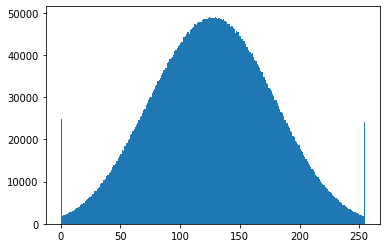

In [23]:
# try to remove gaussian noise
bins = [i for i in range(0,256)]
noise1 = np.random.normal(0,20,size=imageF8.shape)
plt.hist((imageF8-noise1).clip(0,255).flatten(), bins)

array([[109, 130, 186, ...,  74,  66,  87],
       [119, 131, 126, ..., 137, 122,  42],
       [132, 163, 136, ..., 114,  98,  72],
       ...,
       [123, 161, 139, ..., 110, 104,  94],
       [168, 132, 117, ..., 110,  99, 146],
       [ 96, 130, 125, ...,  91, 120, 126]], dtype=uint8)